In [1]:
import scipy.stats as stats, math
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import numpy as np, random, math, seaborn as sns
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')
import time 
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve, cross_val_score


### Persistent vs Non Presistent

In [2]:
# Converting the csv into dataframe
df4 = pd.read_csv('Persistent_vs_NonPersistent.csv')
df4.columns

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Com

In [3]:
len(df4.columns) # Number of columns in that dataset

69

In [4]:
df4

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0


In [5]:
## uniqueness in the features
for column in df4.columns:
    print(column, len(df4[column].unique()))


Ptid 3424
Persistency_Flag 2
Gender 2
Race 4
Ethnicity 3
Region 5
Age_Bucket 4
Ntm_Speciality 36
Ntm_Specialist_Flag 2
Ntm_Speciality_Bucket 3
Gluco_Record_Prior_Ntm 2
Gluco_Record_During_Rx 2
Dexa_Freq_During_Rx 58
Dexa_During_Rx 2
Frag_Frac_Prior_Ntm 2
Frag_Frac_During_Rx 2
Risk_Segment_Prior_Ntm 2
Tscore_Bucket_Prior_Ntm 2
Risk_Segment_During_Rx 3
Tscore_Bucket_During_Rx 3
Change_T_Score 4
Change_Risk_Segment 4
Adherent_Flag 2
Idn_Indicator 2
Injectable_Experience_During_Rx 2
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms 2
Comorb_Encounter_For_Immunization 2
Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx 2
Comorb_Vitamin_D_Deficiency 2
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified 2
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx 2
Comorb_Long_Term_Current_Drug_Therapy 2
Comorb_Dorsalgia 2
Comorb_Personal_History_Of_Other_Diseases_And_Conditions 2
Comorb_Other_Disorders_Of_Bone_Density_And_Structure 2
Comorb_Disorders_of_lipoprotei

In [6]:
# Finding null values in the dataset
nulls = df4.isnull().any()
for i in range(len(nulls)): 
    if nulls[i] == True : print(nulls[i])
# No null values in the dataset

<AxesSubplot:xlabel='Persistency_Flag', ylabel='count'>

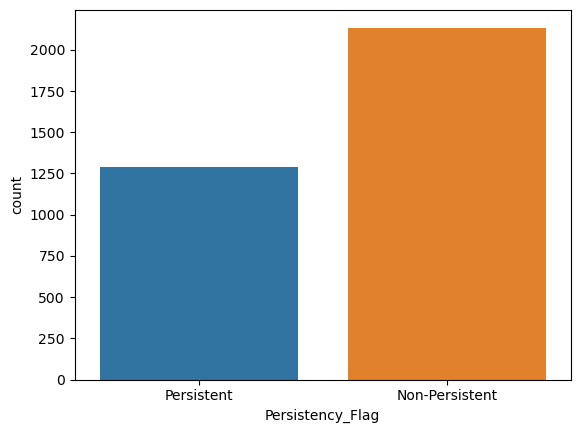

In [7]:
#Plotting Persistent vs NonPersistent values count
sns.countplot(x = "Persistency_Flag", data = df4)

In [8]:
# Dropping target variable
y = df4['Persistency_Flag']
X = df4.drop(columns=['Persistency_Flag','Race','Region', 'Ethnicity', 'Idn_Indicator','Ptid'])

In [9]:
# Converting the categorcial target variable into numeric
led = LabelEncoder()
y1 = led.fit_transform(np.ravel(y))
y1 # Label Encoded target attribute
# Persistent - 1; NonPersistent - 0

array([1, 0, 0, ..., 1, 0, 0])

In [10]:
#Numeric columns of the dataframe
df = df4.drop('Persistency_Flag', axis = 1)
numeric_columns = df.select_dtypes(include=['float', 'int']).columns.tolist()
print(numeric_columns)
# finding correlation of features for feature selection or removal
print(df.corr())
# Seems two features aren't correlated

# Apply LabelEncoder to each non-numeric column
non_numeric_columns = df.select_dtypes(exclude=['float', 'int']).columns.tolist()
for i in non_numeric_columns:
    led = LabelEncoder()
    df[i] = led.fit_transform(df[i].astype(str))

['Dexa_Freq_During_Rx', 'Count_Of_Risks']
                     Dexa_Freq_During_Rx  Count_Of_Risks
Dexa_Freq_During_Rx             1.000000        0.013964
Count_Of_Risks                  0.013964        1.000000


In [11]:
df

,Ptid,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,0,1,2,1,4,3,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1111,1,1,1,4,0,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2222,0,3,0,0,1,5,0,1,0,...,0,1,0,0,0,0,0,0,0,2
3,2758,0,2,1,0,3,5,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,2869,0,2,1,0,3,5,0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,2691,0,2,1,3,3,5,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3420,2692,0,2,1,3,3,34,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3421,2693,0,2,1,3,3,3,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3422,2694,0,2,1,3,0,34,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
train_X, test_X, train_y, test_y = train_test_split(df, y1, test_size=0.2, random_state=42)

'Log Reg Precision: 0.8245614035087719'

'Log Reg Recall: 0.8723897911832946'

'Log Reg F1: 0.8478015783540023'

Accuracy: 0.8029197080291971
Runtime: 0.2539188861846924


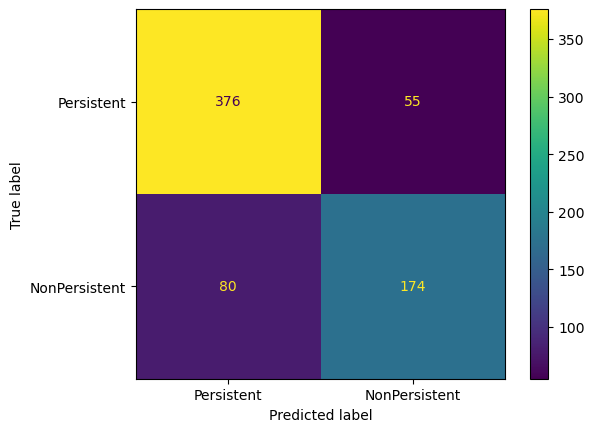

In [13]:
# Logistic Regression
# fit a model
start_time = time.time()

model = LogisticRegression(solver='newton-cg')#, max_iter=3000, penalty='elasticnet',l1_ratio=1)
model.fit(train_X, train_y)

y_pred = model.predict(test_X)
end_time = time.time()
p, r, f, s = precision_recall_fscore_support(test_y,y_pred)
display("Log Reg Precision: {}".format(p[0]))
display("Log Reg Recall: {}".format(r[0]))
display("Log Reg F1: {}".format(f[0]))

print("Accuracy:", accuracy_score(test_y, y_pred))
print("Runtime:", end_time - start_time)

confusion_matrix = metrics.confusion_matrix(test_y, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Persistent', 'NonPersistent'])
cm_display.plot()
plt.show()

Runtime: 0.25142836570739746


'Log Reg Precision: 0.9316546762589928'

'Log Reg Recall: 0.6009280742459396'

'Log Reg F1: 0.7306064880112835'

Accuracy: 0.7211678832116788


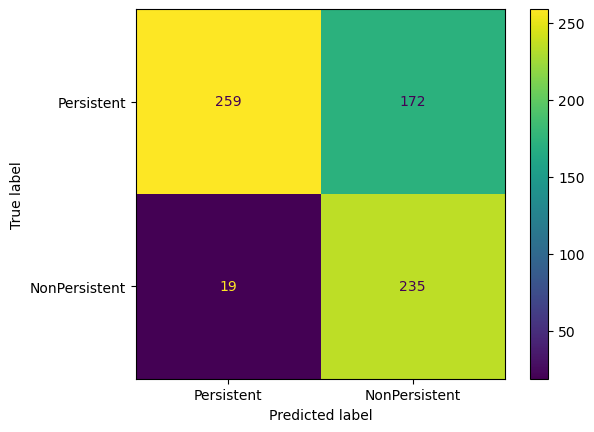

In [14]:
start_time = time.time()

logReg = LogisticRegression(class_weight={0: 0.16, 1: 0.84}, solver='newton-cg')
logReg.fit(train_X, train_y)

y_pred = logReg.predict(test_X)
end_time = time.time()
print("Runtime:", end_time - start_time)
p, r, f, s = precision_recall_fscore_support(test_y,y_pred)
display("Log Reg Precision: {}".format(p[0]))
display("Log Reg Recall: {}".format(r[0]))
display("Log Reg F1: {}".format(f[0]))
print("Accuracy:", accuracy_score(test_y, y_pred))
confusion_matrix = metrics.confusion_matrix(test_y, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Persistent', 'NonPersistent'])
cm_display.plot()
plt.show()

Runtime: 0.03180956840515137


'Log Reg Precision: 0.9285714285714286'

'Log Reg Recall: 0.6032482598607889'

'Log Reg F1: 0.7313642756680732'

Accuracy: 0.7211678832116788


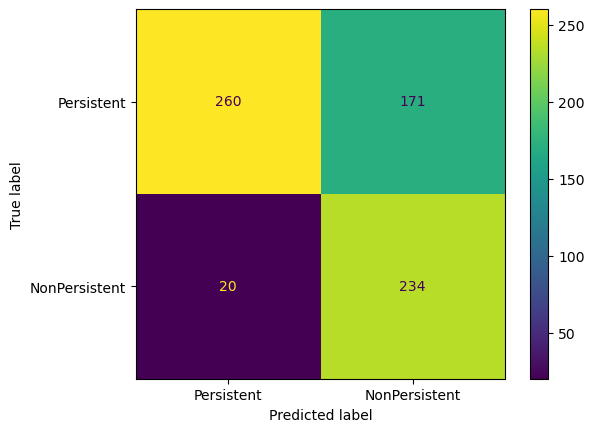

In [15]:
start_time = time.time()

logReg1 = LogisticRegression(class_weight={0: 0.16, 1: 0.84}, solver='liblinear')
logReg1.fit(train_X, train_y)

y_pred = logReg1.predict(test_X)
end_time = time.time()
print("Runtime:", end_time - start_time)
p, r, f, s = precision_recall_fscore_support(test_y,y_pred)
display("Log Reg Precision: {}".format(p[0]))
display("Log Reg Recall: {}".format(r[0]))
display("Log Reg F1: {}".format(f[0]))
print("Accuracy:", accuracy_score(test_y, y_pred))

confusion_matrix = metrics.confusion_matrix(test_y, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Persistent', 'NonPersistent'])
cm_display.plot()
plt.show()

Runtime: 0.03285574913024902


'Log Reg Precision: 0.8219780219780219'

'Log Reg Recall: 0.8677494199535963'

'Log Reg F1: 0.8442437923250563'

Accuracy: 0.7985401459854015


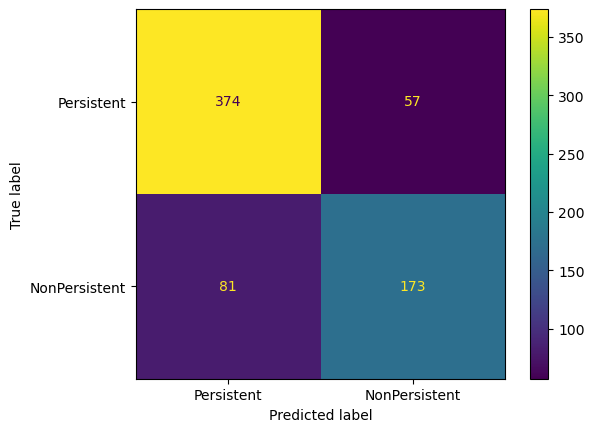

In [16]:
start_time = time.time()

model1 = LogisticRegression(solver='liblinear')#, max_iter=3000, penalty='elasticnet',l1_ratio=1)
model1.fit(train_X, train_y)

y_pred = model1.predict(test_X)
end_time = time.time()
print("Runtime:", end_time - start_time)
p, r, f, s = precision_recall_fscore_support(test_y,y_pred)
display("Log Reg Precision: {}".format(p[0]))
display("Log Reg Recall: {}".format(r[0]))
display("Log Reg F1: {}".format(f[0]))
print("Accuracy:", accuracy_score(test_y, y_pred))

confusion_matrix = metrics.confusion_matrix(test_y, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Persistent', 'NonPersistent'])
cm_display.plot()
plt.show()

Runtime: 0.18503379821777344


'Log Reg Precision: 0.875968992248062'

'Log Reg Recall: 0.26218097447795824'

'Log Reg F1: 0.40357142857142864'

Accuracy: 0.7985401459854015


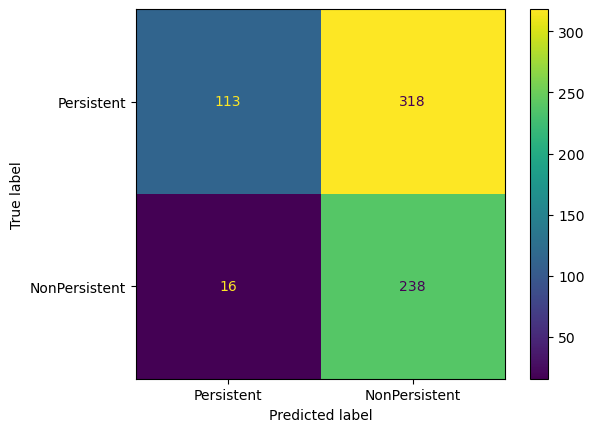

In [17]:
start_time = time.time()
support = svm.LinearSVC(random_state=20)

# Train the model using the training sets and check score on test dataset
support.fit(train_X, train_y)

predicted= support.predict(test_X)
end_time = time.time()
print("Runtime:", end_time - start_time)
p, r, f, s =precision_recall_fscore_support(test_y,predicted)
display("Log Reg Precision: {}".format(p[0]))
display("Log Reg Recall: {}".format(r[0]))
display("Log Reg F1: {}".format(f[0]))
print("Accuracy:", accuracy_score(test_y, y_pred))

confusion_matrix = metrics.confusion_matrix(test_y, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Persistent', 'NonPersistent'])
cm_display.plot()
plt.show()

## SVM

In [18]:
train_X = StandardScaler().fit_transform(train_X)
test_X = StandardScaler().fit_transform(test_X)

Runtime: 0.2827887535095215


'Polynomial SVM Precision: 0.8004073319755601'

'Polynomial SVM Recall: 0.9118329466357309'

'Polynomial SVM F1: 0.8524945770065078'

Accuracy: 0.8014598540145985


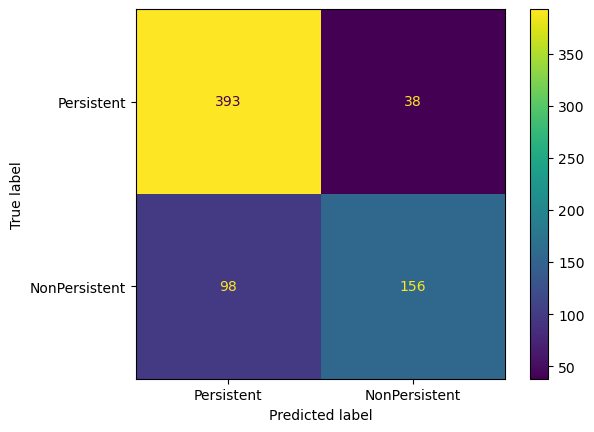

In [19]:
start_time = time.time()

svmCLFpoly = svm.SVC(kernel='poly', class_weight='balanced', gamma='scale', degree=3)
svmCLFpoly.fit(train_X, train_y)

y_pred = svmCLFpoly.predict(test_X)
end_time = time.time()
print("Runtime:", end_time - start_time)
p, r, f, s = precision_recall_fscore_support(test_y, y_pred)#, labels=[1])
display("Polynomial SVM Precision: {}".format(p[0]))
display("Polynomial SVM Recall: {}".format(r[0]))
display("Polynomial SVM F1: {}".format(f[0]))
print("Accuracy:", accuracy_score(test_y, y_pred))

confusion_matrix = metrics.confusion_matrix(test_y, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Persistent', 'NonPersistent'])
cm_display.plot()
plt.show()


Runtime: 0.27958106994628906


'Polynomial SVM Precision: 0.8004073319755601'

'Polynomial SVM Recall: 0.9118329466357309'

'Polynomial SVM F1: 0.8524945770065078'

Accuracy: 0.8014598540145985


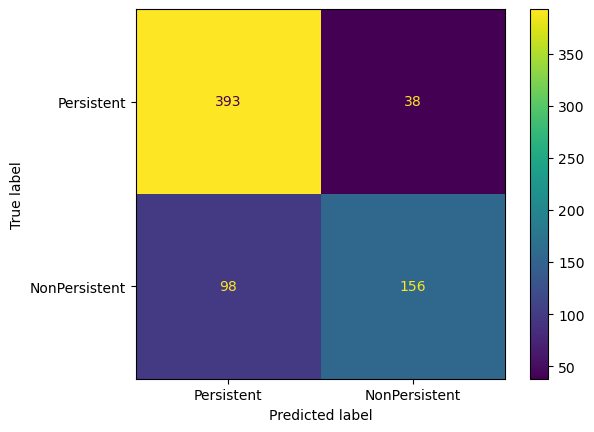

In [20]:
start_time = time.time()

svmCLFpoly = svm.SVC(kernel='poly', class_weight='balanced', gamma='auto', degree=3,decision_function_shape='ovo')# ovr
svmCLFpoly.fit(train_X, train_y)

y_pred = svmCLFpoly.predict(test_X)
end_time = time.time()
print("Runtime:", end_time - start_time)
p, r, f, s = precision_recall_fscore_support(test_y, y_pred)#, labels=[1])
display("Polynomial SVM Precision: {}".format(p[0]))
display("Polynomial SVM Recall: {}".format(r[0]))
display("Polynomial SVM F1: {}".format(f[0]))
print("Accuracy:", accuracy_score(test_y, y_pred))

# Credit to w3schools for the confusion matrix code
confusion_matrix = metrics.confusion_matrix(test_y, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Persistent', 'NonPersistent'])
cm_display.plot()
plt.show()


Runtime: 0.557063102722168


'RBF SVM Precision: 0.7986425339366516'

'RBF SVM Recall: 0.8190255220417634'

'RBF SVM F1: 0.8087056128293242'

Accuracy: 0.7562043795620438


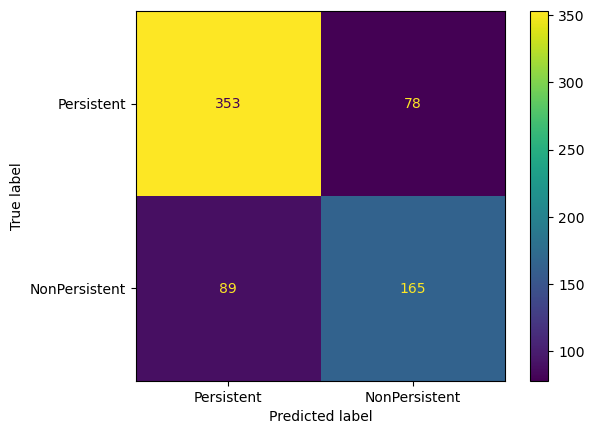

In [21]:
start_time = time.time()

svmCLFrbf = svm.SVC(kernel='rbf', class_weight='balanced', gamma=.1)
svmCLFrbf.fit(train_X, train_y)

y_pred = svmCLFrbf.predict(test_X)
end_time = time.time()
print("Runtime:", end_time - start_time)
p, r, f, s = precision_recall_fscore_support(test_y, y_pred)
display("RBF SVM Precision: {}".format(p[0]))
display("RBF SVM Recall: {}".format(r[0]))
display("RBF SVM F1: {}".format(f[0]))
print("Accuracy:", accuracy_score(test_y, y_pred))

confusion_matrix = metrics.confusion_matrix(test_y, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Persistent', 'NonPersistent'])
cm_display.plot()
plt.show()


Is there a difference between the polynomial and RBF SVMs? - Polynomial performances better than RBF SVM

Runtime: 1.8985998630523682


'Linear SVM Precision: 0.8564356435643564'

'Linear SVM Recall: 0.802784222737819'

'Linear SVM F1: 0.8287425149700598'

Accuracy: 0.7912408759124088


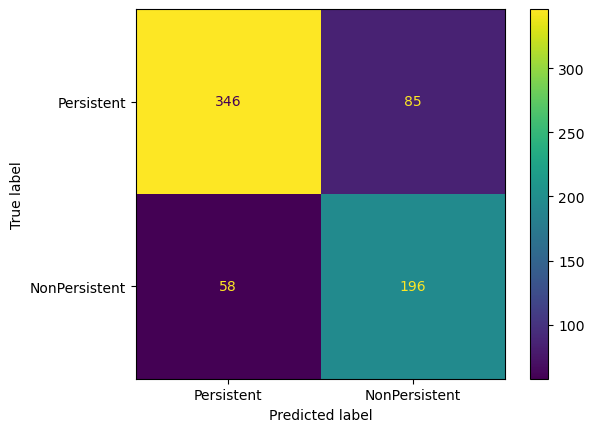

In [22]:
 RBstart_time = time.time()

svmCLFlnr = svm.SVC(kernel='linear', class_weight='balanced', gamma=10)
svmCLFlnr.fit(train_X, train_y)

y_pred = svmCLFlnr.predict(test_X)
end_time = time.time()
print("Runtime:", end_time - start_time)

p, r, f, s = precision_recall_fscore_support(test_y, y_pred)
display("Linear SVM Precision: {}".format(p[0]))
display("Linear SVM Recall: {}".format(r[0]))
display("Linear SVM F1: {}".format(f[0]))
print("Accuracy:", accuracy_score(test_y, y_pred))

# Credit to w3schools for the confusion matrix code
confusion_matrix = metrics.confusion_matrix(test_y, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Persistent', 'NonPersistent'])
cm_display.plot()
plt.show()


### Can logistic regression or a linear SVM predict well?

In [23]:

dict1 ={0:0,1:1}
balanced =[dict1,'balanced']
# Define the hyperparameters to tune
parameters = {'kernel':('linear','ploy', 'rbf'),'C':[0.1, 1, 10], 'gamma': ('auto','scale',0.1,1.10),
              'decision_function_shape':('ovo', 'ovr'), 'degree':(2,3,4,5), 'class_weight':(balanced)}

# Create an SVM classifier
svc = svm.SVC()

# Perform grid search with cross-validation
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(train_X, train_y)

# Print the best hyperparameters and their corresponding score
print("Best hyperparameters: ", clf.best_params_)
print("Best score: ", clf.best_score_)


Best hyperparameters:  {'C': 1, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Best score:  0.8068629151710056


In [24]:
results = clf.cv_results_
for i in range(len(results['params'])):
    print("Model {}: {}".format(i, results['params'][i]))
    print("Test score: {:.3f} (std: {:.3f})".format(
        results['mean_test_score'][i], results['std_test_score'][i]))

Model 0: {'C': 0.1, 'class_weight': {0: 0, 1: 1}, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
Test score: 0.378 (std: 0.000)
Model 1: {'C': 0.1, 'class_weight': {0: 0, 1: 1}, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'auto', 'kernel': 'ploy'}
Test score: nan (std: nan)
Model 2: {'C': 0.1, 'class_weight': {0: 0, 1: 1}, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Test score: 0.378 (std: 0.000)
Model 3: {'C': 0.1, 'class_weight': {0: 0, 1: 1}, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Test score: 0.378 (std: 0.000)
Model 4: {'C': 0.1, 'class_weight': {0: 0, 1: 1}, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'scale', 'kernel': 'ploy'}
Test score: nan (std: nan)
Model 5: {'C': 0.1, 'class_weight': {0: 0, 1: 1}, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Test score: 0.378 (std: 0.000)
Model 6: {'C': 0.1, 'clas

In [25]:
lg = LogisticRegression()
hyperparameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],'solver': ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga'],
    'penalty': ['l1', 'l2','elasticnet'], 'multi_class':['auto','ovr','multinomial']
}

# Perform grid search cross-validation
grid_search = GridSearchCV(lg, hyperparameters, cv=5)
grid_search.fit(train_X, train_y)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print('\n\n')
results = grid_search.cv_results_
for i in range(len(results['params'])):
    print("Model {}: {}".format(i, results['params'][i]))
    print("Test score: {:.3f} (std: {:.3f})".format(
        results['mean_test_score'][i], results['std_test_score'][i]))

Best hyperparameters:  {'C': 0.1, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'saga'}
Best score:  0.8163553023125477



Model 0: {'C': 0.001, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'lbfgs'}
Test score: nan (std: nan)
Model 1: {'C': 0.001, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}
Test score: 0.622 (std: 0.000)
Model 2: {'C': 0.001, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'newton-cg'}
Test score: nan (std: nan)
Model 3: {'C': 0.001, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'newton-cholesky'}
Test score: nan (std: nan)
Model 4: {'C': 0.001, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'sag'}
Test score: nan (std: nan)
Model 5: {'C': 0.001, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'saga'}
Test score: 0.622 (std: 0.000)
Model 6: {'C': 0.001, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}
Test score: 0.797 (std: 0.009)
Model 7: {'C': 0.001, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'}
Test 

### Which variables are predictive of the target variable?

In [26]:
# Split the dataset into training and testing sets
X = df4.drop("Persistency_Flag", axis=1)
y = df4["Persistency_Flag"]
X_train, X_test, y_train, y_test = train_test_split(df, y1, test_size=0.2, random_state=42)

# Train the Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)

# Print the feature importance scores
importance_scores = pd.DataFrame({'Features':X_train.columns, 'Importance':clf.feature_importances_})
print('Top 10 important features of the dataset are \n',importance_scores.sort_values(by='Importance', ascending=False).head(10))

Top 10 important features of the dataset are 
                                              Features  Importance
11                                Dexa_Freq_During_Rx    0.500764
30              Comorb_Long_Term_Current_Drug_Therapy    0.086203
0                                                Ptid    0.042137
26  Comorb_Encntr_For_General_Exam_W_O_Complaint,_...    0.041345
25                  Comorb_Encounter_For_Immunization    0.036005
24  Comorb_Encounter_For_Screening_For_Malignant_N...    0.033890
8                               Ntm_Speciality_Bucket    0.017219
42                            Concom_Fluoroquinolones    0.015952
47                              Concom_Viral_Vaccines    0.015824
4                                              Region    0.015567


### Decision Boundary

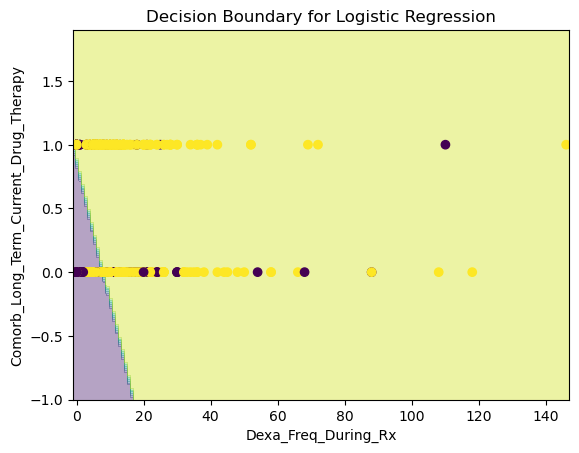

In [27]:
X_tr, X_te, y_tr, y_te = train_test_split(df[['Dexa_Freq_During_Rx',
                                              'Comorb_Long_Term_Current_Drug_Therapy']],y1, test_size=0.2, random_state=0)

lg1 = LogisticRegression()
lg1.fit(X_tr,y_tr)

# plot the decision boundary
xx1, xx2 = np.meshgrid(np.arange(X_tr.iloc[:, 0].min() - 1, X_tr.iloc[:, 0].max() + 1,0.1),
                       np.arange(X_tr.iloc[:, 1].min() - 1, X_tr.iloc[:, 1].max() + 1, 0.1))
Z = lg1.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.4)
plt.scatter(X_tr.iloc[:, 0], X_tr.iloc[:, 1], c=y_tr)
plt.xlabel('Dexa_Freq_During_Rx')
plt.ylabel('Comorb_Long_Term_Current_Drug_Therapy')
plt.title('Decision Boundary for Logistic Regression')
plt.show()


### Learning Curve

Cross-validation scores: [0.84671533 0.82846715 0.81021898 0.7919708  0.79927007 0.81021898
 0.81751825 0.81386861 0.81751825 0.83150183]
Mean cross-validation score: 0.8167268254859495


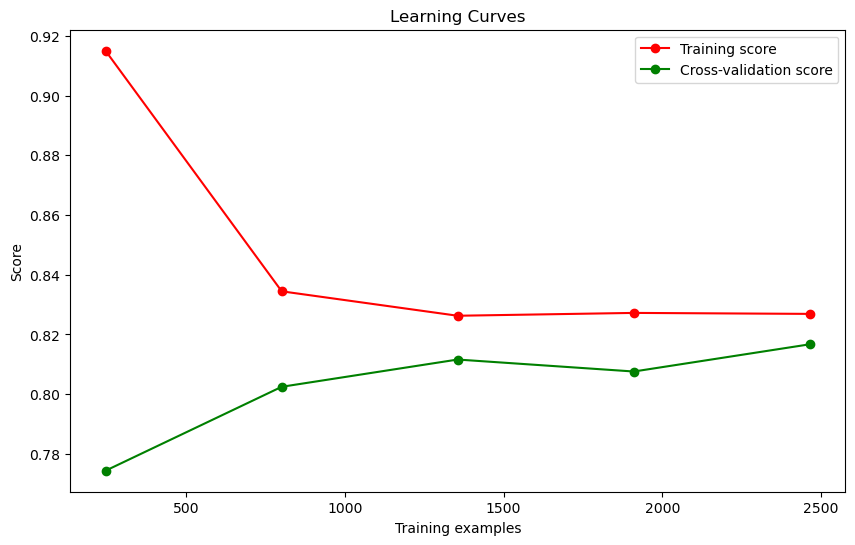

In [28]:
# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(model, train_X, train_y, cv=10, scoring='accuracy')

# Calculate cross-validation scores
cv_scores = cross_val_score(model, train_X,train_y, cv=10, scoring='accuracy')

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend()
plt.title("Learning Curves")

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))


Cross-validation scores: [0.84671533 0.82846715 0.81021898 0.7919708  0.79927007 0.81021898
 0.81751825 0.81386861 0.81751825 0.83150183]
Mean cross-validation score: 0.8167268254859495


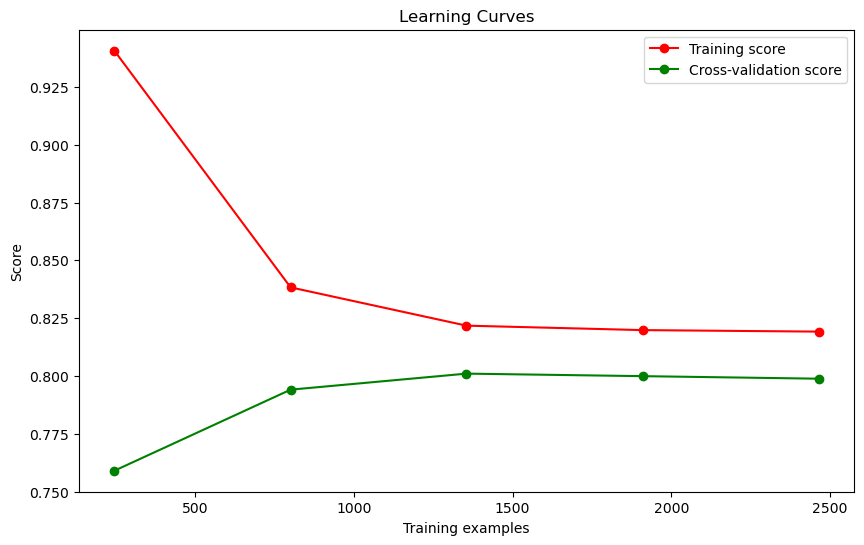

In [29]:
# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(svmCLFlnr, train_X, train_y, cv=10, scoring='accuracy')

# Calculate cross-validation scores
cv_scores = cross_val_score(model, train_X,train_y, cv=10, scoring='accuracy')

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend()
plt.title("Learning Curves")

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

### Loan Data

In [30]:
df = pd.read_csv('loan_data.csv')

df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Need one hot encoding for the "purpose" column. Will use pandas dummies functionality to convert this categorical column:

In [31]:
df = pd.get_dummies(df)

df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


Standardize data (people have different loan feature amounts). Split into X and y:

In [32]:
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

# MUST Standardize the data or else the SVM will not work- it will take forever to run.
X = StandardScaler().fit_transform(X)
# X = MinMaxScaler(feature_range=(0, 1)).fit_transform(X)


Calculate optimal proportion of "fully paid" (0) to "not fully paid" (1):

In [33]:
display(df['not.fully.paid'].value_counts())

display("Proportion of people fully paid => {}".format(1533/(1533 + 8045)))
display("Proportion of people not fully paid => {}".format(8045/(1533 + 8045)))

0    8045
1    1533
Name: not.fully.paid, dtype: int64

'Proportion of people fully paid => 0.16005429108373356'

'Proportion of people not fully paid => 0.8399457089162664'

'Log Reg Precision: 0.24820430965682364'

'Log Reg Recall: 0.6086105675146771'

'Log Reg F1: 0.35260770975056693'

Accuracy: 0.6423052829400709


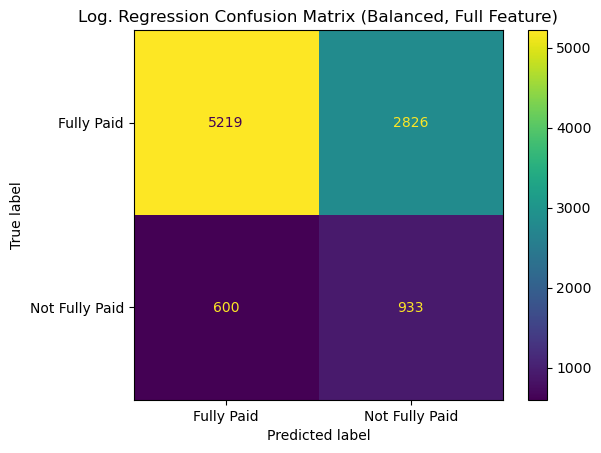

In [34]:
# Not fully paid = 0, fully paid = 1
# First attempting with all features and balanced class weight'
# Using liblinear instead of lfgs results in better prf scores & convergence issues

logReg = LogisticRegression(class_weight='balanced', solver='liblinear')
logReg.fit(X, y.values.ravel())

y_pred = logReg.predict(X)
p, r, f, s = precision_recall_fscore_support(y, y_pred, labels=[1])
display("Log Reg Precision: {}".format(p[0]))
display("Log Reg Recall: {}".format(r[0]))
display("Log Reg F1: {}".format(f[0]))
print("Accuracy:", accuracy_score(y, y_pred))

# Credit to w3schools for the confusion matrix code
confusion_matrix = metrics.confusion_matrix(y, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Fully Paid', 'Not Fully Paid'])
cm_display.plot()
cm_display.ax_.set_title("Log. Regression Confusion Matrix (Balanced, Full Feature)")
plt.show()
#cm_display.figure_.savefig('./LoanFigs/Log_Reg(Balanced, Full Features).pdf')

Using customized class weights:

'Log Reg Precision: 0.24813829787234043'

'Log Reg Recall: 0.6086105675146771'

'Log Reg F1: 0.3525410920083129'

Accuracy: 0.6422008770098142


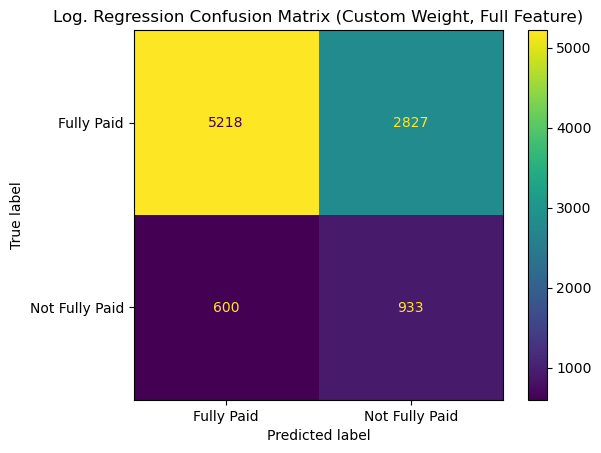

In [35]:
# Not fully paid = 0, fully paid = 1
# Attempting with all features and modified class weight
# Using liblinear instead of lfgs results in better prf scores & convergence issues

logRegcw = LogisticRegression(class_weight={0: 0.16, 1: 0.84}, solver='liblinear')
logRegcw.fit(X, y.values.ravel())

y_pred = logRegcw.predict(X)
p, r, f, s = precision_recall_fscore_support(y, y_pred, labels=[1])
display("Log Reg Precision: {}".format(p[0]))
display("Log Reg Recall: {}".format(r[0]))
display("Log Reg F1: {}".format(f[0]))
print("Accuracy:", accuracy_score(y, y_pred))

# Credit to w3schools for the confusion matrix code
confusion_matrix = metrics.confusion_matrix(y, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Fully Paid', 'Not Fully Paid'])
cm_display.plot()
cm_display.ax_.set_title("Log. Regression Confusion Matrix (Custom Weight, Full Feature)")
plt.show()
#cm_display.figure_.savefig('./LoanFigs/Log_Reg(Custom Weight, Full Features).pdf')

Using fewer classes:

'Log Reg Precision: 0.24813829787234043'

'Log Reg Recall: 0.6086105675146771'

'Log Reg F1: 0.3525410920083129'

Accuracy: 0.6422008770098142


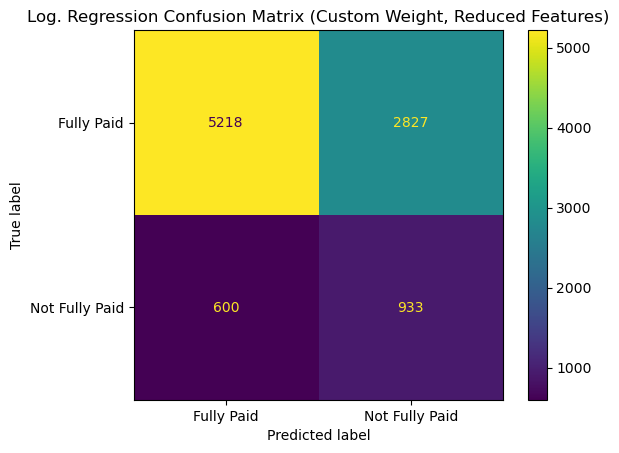

In [36]:
# Not fully paid = 0, fully paid = 1
# Attempting with fewer features and modified class weight
# Using liblinear instead of lfgs results in better prf scores & convergence issues

logRegl = LogisticRegression(class_weight={0: 0.16, 1: 0.84}, solver='liblinear')
logRegl.fit(X, y.values.ravel())

y_pred = logRegl.predict(X)
p, r, f, s = precision_recall_fscore_support(y, y_pred, labels=[1])
display("Log Reg Precision: {}".format(p[0]))
display("Log Reg Recall: {}".format(r[0]))
display("Log Reg F1: {}".format(f[0]))
print("Accuracy:", accuracy_score(y, y_pred))

# Credit to w3schools for the confusion matrix code
confusion_matrix = metrics.confusion_matrix(y, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Fully Paid', 'Not Fully Paid'])
cm_display.plot()
cm_display.ax_.set_title("Log. Regression Confusion Matrix (Custom Weight, Reduced Features)")
plt.show()
#cm_display.figure_.savefig('./LoanFigs/Log_Reg(Custom Weight, Reduced Features).pdf')

SVM Using Linear Kernel

'Linear SVM Precision: 0.2694406548431105'

'Linear SVM Recall: 0.5153294194390085'

'Linear SVM F1: 0.3538633818589026'

Accuracy: 0.6987888912090207


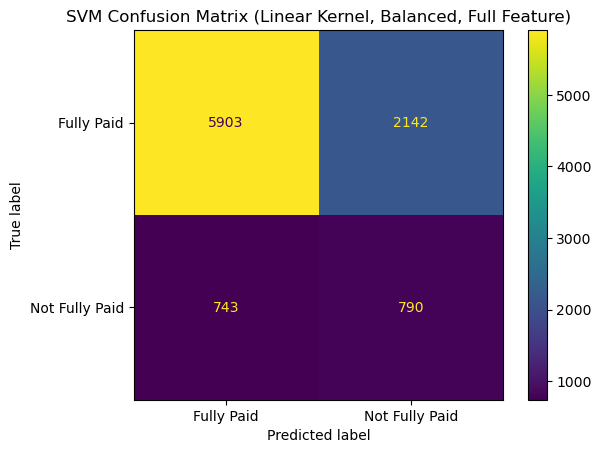

In [37]:
svmCLFli = svm.SVC(kernel='linear', class_weight='balanced', gamma='auto')
svmCLFli.fit(X, y.values.ravel())

y_pred = svmCLFli.predict(X)
p, r, f, s = precision_recall_fscore_support(y, y_pred, labels=[1])
display("Linear SVM Precision: {}".format(p[0]))
display("Linear SVM Recall: {}".format(r[0]))
display("Linear SVM F1: {}".format(f[0]))
print("Accuracy:", accuracy_score(y, y_pred))

# Credit to w3schools for the confusion matrix code
confusion_matrix = metrics.confusion_matrix(y, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Fully Paid', 'Not Fully Paid'])
cm_display.plot()
cm_display.ax_.set_title("SVM Confusion Matrix (Linear Kernel, Balanced, Full Feature)")
plt.show()
#cm_display.figure_.savefig('./LoanFigs/SVM(Linear, Balanced, Full Features).pdf')

Will now use polynomial kernel

'Polynomial SVM Precision: 0.3265602322206096'

'Polynomial SVM Recall: 0.5870841487279843'

'Polynomial SVM F1: 0.41967824667754716'

Accuracy: 0.7401336395907288


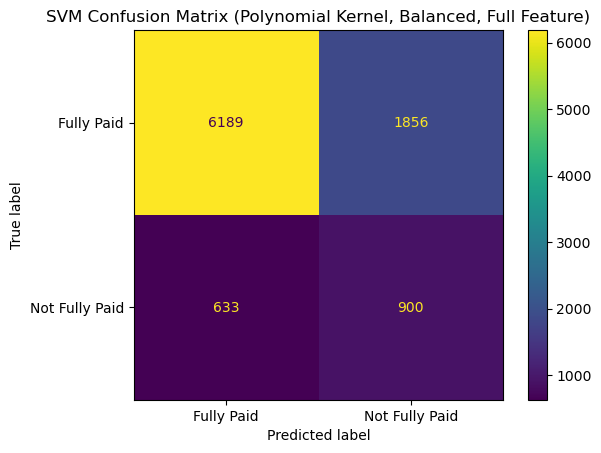

In [38]:
svmCLFpl = svm.SVC(kernel='poly', class_weight='balanced', gamma='auto', degree=3)
svmCLFpl.fit(X, y.values.ravel())

y_pred = svmCLFpl.predict(X)
p, r, f, s = precision_recall_fscore_support(y, y_pred, labels=[1])
display("Polynomial SVM Precision: {}".format(p[0]))
display("Polynomial SVM Recall: {}".format(r[0]))
display("Polynomial SVM F1: {}".format(f[0]))
print("Accuracy:", accuracy_score(y, y_pred))

# Credit to w3schools for the confusion matrix code
confusion_matrix = metrics.confusion_matrix(y, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Fully Paid', 'Not Fully Paid'])
cm_display.plot()
cm_display.ax_.set_title("SVM Confusion Matrix (Polynomial Kernel, Balanced, Full Feature)")
plt.show()
#cm_display.figure_.savefig('./LoanFigs/SVM(Polynomial, Balanced, Full Features).pdf')

Will now use RBF kernel:

'RBF SVM Precision: 0.8978145304193739'

'RBF SVM Recall: 0.9915198956294846'

'RBF SVM F1: 0.9423434593924365'

Accuracy: 0.980580496972228


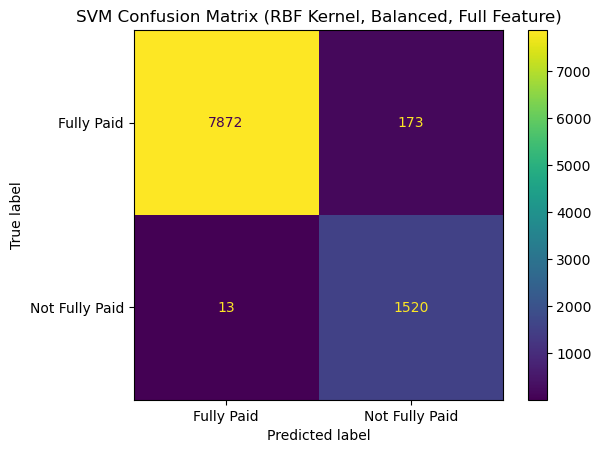

In [39]:
svmCLFrb = svm.SVC(kernel='rbf', class_weight='balanced', gamma=1)
svmCLFrb.fit(X, y.values.ravel())

y_pred = svmCLFrb.predict(X)
p, r, f, s = precision_recall_fscore_support(y, y_pred, labels=[1])
display("RBF SVM Precision: {}".format(p[0]))
display("RBF SVM Recall: {}".format(r[0]))
display("RBF SVM F1: {}".format(f[0]))
print("Accuracy:", accuracy_score(y, y_pred))

# Credit to w3schools for the confusion matrix code
confusion_matrix = metrics.confusion_matrix(y, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Fully Paid', 'Not Fully Paid'])
cm_display.plot()
cm_display.ax_.set_title("SVM Confusion Matrix (RBF Kernel, Balanced, Full Feature)")
plt.show()
#cm_display.figure_.savefig('./LoanFigs/SVM(RBF, Balanced, Full Features).pdf')

Text(0.5, 1.0, 'FICO Score vs Interest Rate Scatterplot')

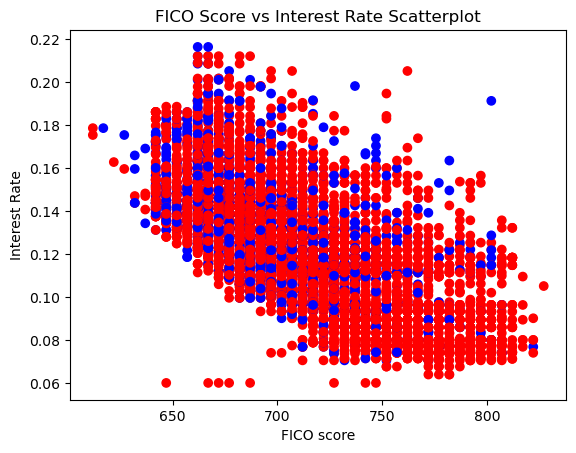

In [40]:
color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(df.fico, df[['int.rate']], c=color)
plt.xlabel('FICO score')
plt.ylabel('Interest Rate')
plt.title("FICO Score vs Interest Rate Scatterplot")
#plt.savefig('./LoanFigs/FicoVsInterestRate.pdf')

Text(0.5, 1.0, 'Debt to Income Ratio vs Interest Rate Scatterplot')

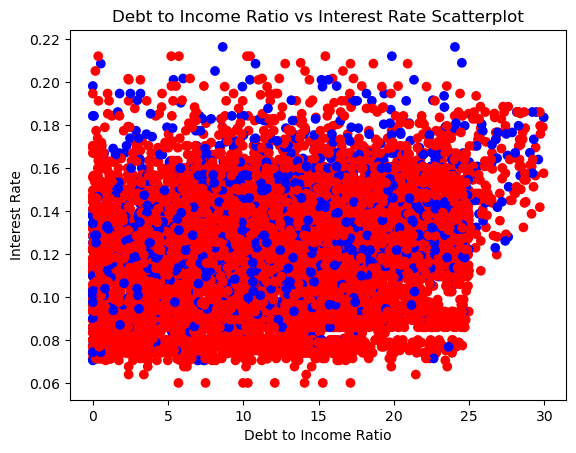

In [41]:
color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(df.dti, df[['int.rate']], c=color)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Interest Rate')
plt.title("Debt to Income Ratio vs Interest Rate Scatterplot")
#plt.savefig('./LoanFigs/DebttoIncomeVsInterestRate.pdf')

Text(0.5, 1.0, 'Revolving Balance Utilization vs Debt to Income Scatterplot')

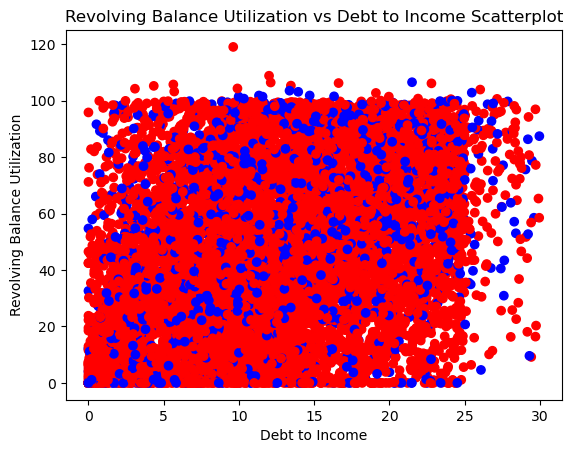

In [42]:
color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(df.dti, df[['revol.util']], c=color)
plt.xlabel('Debt to Income')
plt.ylabel('Revolving Balance Utilization')
plt.title("Revolving Balance Utilization vs Debt to Income Scatterplot")
#plt.savefig('./LoanFigs/DebttoIncomeVsRevolvingBalanceUtilization.pdf')